![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [5]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/mobile-images.zip','r') as z:
  z.extractall()

In [6]:
import cv2
no_mobile_path = '/content/drive/MyDrive/Colab Notebooks/mobile-images/no-mobile'
yes_mobile_path = '/content/drive/MyDrive/Colab Notebooks/mobile-images/yes-mobile'
print('No Mobile Images :' ,len(os.listdir(no_mobile_path)))
print('Yes Mobile Images :' ,len(os.listdir(yes_mobile_path)))

No Mobile Images : 121
Yes Mobile Images : 124


#### Data Inference: Of 245 image data we have 124 images that contain Mobile images and remaining not containing Mobile images.

Shape & Image with Mobile: 
 (90, 90, 3)


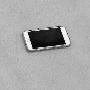

Shape & Image with No Mobile: 
 (90, 90, 3)


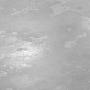

In [7]:
from google.colab.patches import cv2_imshow
yes_mobile = os.listdir(yes_mobile_path)

img1 = cv2.imread(yes_mobile_path + "/" + yes_mobile[0])
print('Shape & Image with Mobile: \n', img1.shape)
cv2_imshow(img1)

no_mobile = os.listdir(no_mobile_path)

img2 = cv2.imread(no_mobile_path + "/" + no_mobile[0])
print('Shape & Image with No Mobile: \n',img2.shape)
cv2_imshow(img2)

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [8]:
x_yes = []
y_yes = []

for i in yes_mobile:
  img = cv2.imread(os.path.join(yes_mobile_path, i)) # Reading the images with mobile
  img = cv2.resize(img,(128,128)) # Resizing the 90 x 90 image to 128 x 128 image
  x_yes.append(img)
  y_yes.append(1) # Label the images with mobile as 1

In [9]:
from google.colab.patches import cv2_imshow
no_mobile = os.listdir(no_mobile_path)
x_no = []
y_no = []

for i in no_mobile:
  img = cv2.imread(os.path.join(no_mobile_path, i)) # Reading the images with no mobile
  img = cv2.resize(img,(128,128)) # Resizing the 90 x 90 image to 128 x 128 image
  x_no.append(img)
  y_no.append(0) # Label the images with no mobile as 0

### Check shape and size of the images

In [10]:
print("Shape of Single Image with Mobile:" ,x_yes[0].shape)
print("Shape of Single Image with No Mobile:" ,x_no[0].shape)
print("Size of Image dataset with Mobile:" ,len(x_yes))
print("Size of Image dataset with No Mobile:" ,len(x_no))


Shape of Single Image with Mobile: (128, 128, 3)
Shape of Single Image with No Mobile: (128, 128, 3)
Size of Image dataset with Mobile: 124
Size of Image dataset with No Mobile: 121


###  What is the percentage of images with and without mobile phone in the data

In [11]:
print('Percentage of Images with Mobile: %.2f' %(len(x_yes)*100/(len(x_yes)+len(x_no))))
print('Percentage of Images with No Mobile: %.2f' %(len(x_no)*100/(len(x_yes)+len(x_no))))

Percentage of Images with Mobile: 50.61
Percentage of Images with No Mobile: 49.39


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [12]:
X = np.concatenate((x_yes,x_no), axis = 0)
y = np.concatenate((y_yes,y_no), axis = 0)

print('Shape of X dataset:', X.shape)
print('Shape of y dataset:',y.shape)

Shape of X dataset: (245, 128, 128, 3)
Shape of y dataset: (245,)


### Shuffle the above data and labels ( Data and label should be in sync)

In [13]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

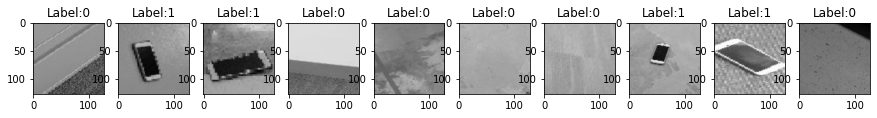

In [14]:
# Checking the images
columns = 10
rows = 1

fig=plt.figure(figsize=(15, 15))

for i in range(1, columns*rows + 1):
    img = X[i]
    fig.add_subplot(rows, columns, i)
    lbl = "Label:" + str(y[i])
    plt.title(lbl)
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')

plt.show()

### Split the data into train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Print shape of the X train and X test data

In [16]:
print('X Train Shape:',X_train.shape)
print('y Train Shape:',y_train.shape)
print('X Test Shape:',X_test.shape)
print('y Test Shape:',y_test.shape)

X Train Shape: (196, 128, 128, 3)
y Train Shape: (196,)
X Test Shape: (49, 128, 128, 3)
y Test Shape: (49,)


In [17]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True) 
print(np.asarray((unique_elements, counts_elements))) # print the count the two classes in train dataset

[[ 0  1]
 [97 99]]


In [18]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements))) # print the count the two classes in test dataset

[[ 0  1]
 [24 25]]


### Normalize the data by dividing by 255

In [19]:
# Treatment for Feature set:
# convert the input values to float32 
trainX = X_train.astype('float32')
testX = X_test.astype('float32')

# normalize the values of image vectors to fit under 1 
trainX /= 255.0
testX /= 255.0

In [20]:
print("Train set shape:", trainX.shape)
print("Test set shape:", testX.shape)

Train set shape: (196, 128, 128, 3)
Test set shape: (49, 128, 128, 3)


###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [21]:
# Treatment for Label set:
from tensorflow.keras import utils 

# convert output label into one hot encoded format  for using cross entropy as loss function
trainY = utils.to_categorical( y_train, 2) 
testY = utils.to_categorical( y_test, 2)

In [22]:
pd.DataFrame(trainY).value_counts() # Validating the label data after one-hot coding is same we found earlier as 97 and 99

0    1  
0.0  1.0    99
1.0  0.0    97
dtype: int64

In [23]:
pd.DataFrame(testY).value_counts() # Validating the label data after one-hot coding is same we found earlier as 24 and 25

0    1  
0.0  1.0    25
1.0  0.0    24
dtype: int64

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [24]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


In [25]:
num_classes = 2

model = Sequential() # Initiatlizing the sequential model
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(128,128,3))) # Adding the first layer with input data
# Used no of filters as 32 with kernel size as 3 x 3. Activation used - ReLu
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2,2))
#Defining FC layers:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#model.add(Dropout(.2))
model.add(Dense(num_classes,activation='softmax')) # for binary class classification useing softmax and no of classes as 2
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7372928   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [26]:
def model_compile(i):
  num_classes = 2
  model = Sequential() # Initiatlizing the sequential model
  model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(128,128,3))) # Adding the first layer with input data
  # Used no of filters as 32 with kernel size as 3 x 3. Activation used - ReLu
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64,kernel_size=3,activation='relu'))
  model.add(MaxPooling2D(2,2))
  #Defining FC layers:
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  #model.add(Dropout(.5))
  model.add(Dense(num_classes,activation='softmax')) # for binary class classification useing softmax and no of classes as 2
  #model.summary()
  if i == 1:
    print("Using Adam as optimizer")
    adam = tensorflow.keras.optimizers.Adam( )
    model.compile(optimizer= adam, loss ='categorical_crossentropy', metrics =['accuracy'])
  else:
    print("Using SGD as optimizer")
    sgd = tensorflow.keras.optimizers.SGD( learning_rate = 0.001)
    model.compile(optimizer= sgd, loss ='categorical_crossentropy', metrics =['accuracy'])

  return model

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
def model_fit(opti):
  batch_size = 32
  n_epochs = 100
  es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)
  model = model_compile(i = opti)
  history = model.fit(X_train, trainY, batch_size=batch_size, epochs=n_epochs, validation_split=0.1, callbacks = [es], verbose=False) #train the model
  hist_df = pd.DataFrame(history.history)
  best_epoch = (pd.DataFrame(history.history['val_accuracy']).shape[0] - 1)
  validation_accuracy = pd.DataFrame(history.history['val_accuracy']).iloc[best_epoch,0]
  Train_accuracy = pd.DataFrame(history.history['accuracy']).iloc[best_epoch,0]
  validation_loss = pd.DataFrame(history.history['val_loss']).iloc[best_epoch,0]
  Train_loss = pd.DataFrame(history.history['loss']).iloc[best_epoch,0]
  if opti == 1:
    optimizer = 'ADAM'
  else:
    optimizer = 'SGD'
  print('\n*****************************************************')
  print('With Optimizer as ', optimizer ,': We get \n')
  print('Training_Accuracy:', np.round((Train_accuracy*100),2))
  print('Training_Loss: %.3f' %Train_loss)
  print('Validation_Accuracy:',np.round((validation_accuracy*100),2))
  print('Validation_Loss: %.3f' %validation_loss)
  return model, hist_df

In [28]:
model1,hist_df1 = model_fit(opti = 0) # model with SGD
model2,hist_df2= model_fit(opti = 1)# model with Adam

Using SGD as optimizer
Epoch 00016: early stopping

*****************************************************
With Optimizer as  SGD : We get 

Training_Accuracy: 59.09
Training_Loss: 0.651
Validation_Accuracy: 60.0
Validation_Loss: 0.662
Using Adam as optimizer
Epoch 00011: early stopping

*****************************************************
With Optimizer as  ADAM : We get 

Training_Accuracy: 99.43
Training_Loss: 0.008
Validation_Accuracy: 80.0
Validation_Loss: 1.754


#### With Adam as optimizer we have better results from the model.

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [29]:
#Evaluate Model with Adam
loss,accuracy  = model2.evaluate(testX, testY, verbose=False)
print('\nModel accuracy : %.2f and loss :%.2f' %(accuracy*100, loss))


Model accuracy : 89.80 and loss :0.66


### Predict label data of the test data and check confusion matrix

In [30]:
y_pred = model2.predict(testX)
y_pred = np.argmax(y_pred,1)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

print('\n*****************************************************')
print(classification_report(y_test,y_pred))



[[22  2]
 [ 3 22]]

*****************************************************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.92      0.88      0.90        25

    accuracy                           0.90        49
   macro avg       0.90      0.90      0.90        49
weighted avg       0.90      0.90      0.90        49



Of 25 images with Mobile, 22 was correctly classified and 3 was incorrectly classified.
Similiarly of 24 images without mobile, 22 was correctly classified with remaining 2 being misclassified.

### Display test images and their predicted label for a few samples

 This is 0 and predicted label is 0


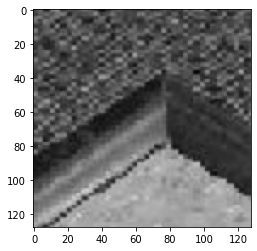

 This is 0 and predicted label is 0


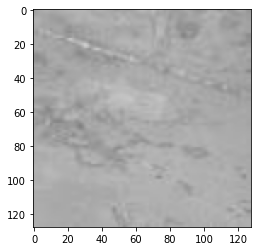

 This is 0 and predicted label is 0


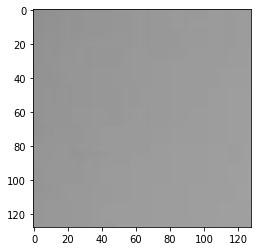

 This is 0 and predicted label is 0


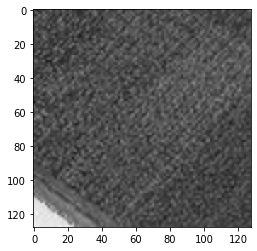

 This is 1 and predicted label is 1


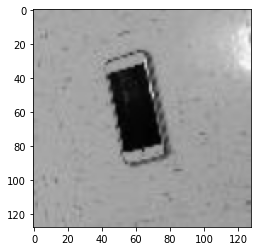

In [31]:
for i in range(5):
  label = y_pred[i]
  actual = y_test[i]
  img = X_test[i]
  print(' This is {} and predicted label is {}'.format(actual,label))
  plt.imshow(img);
  plt.show()

### Print following plots

1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

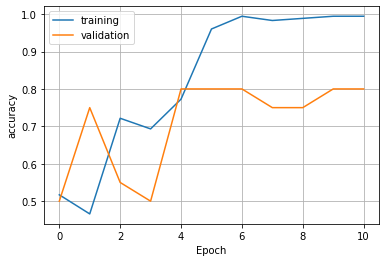

In [32]:
# Accuracy plot
plt.plot(hist_df2.accuracy, label='training_accuracy')
plt.plot(hist_df2.val_accuracy, label='validation_accuracy')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')
plt.grid(True)

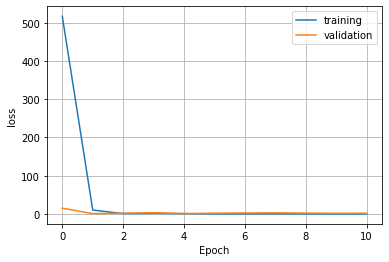

In [33]:
# Loss vs Epochs
plt.plot(hist_df2.loss, label='training_loss')
plt.plot(hist_df2.val_loss, label='validation_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='best')
plt.grid(True)

After 5-6 epochs the validation is not getting improved. Further training would result in overfitting and decrease the validation and test score.

## 7.  Conclusion and Interpretation

### Write your observations and findings

In [33]:
Using Adam optimizer we have better results. 
However we observe overfitting where the training accuracy is high while there is high gap in accuracy with validation and test. 
This is because we have not done much hyper parameter tuning to reduce overfitting and improve the results.

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

Introducing hyperparameter tuning like dropout, weight initialization and regularization using weight decay in the model architecture shall bring down overfitting. Lets try using the same, build and see the result

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               7372928   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)             

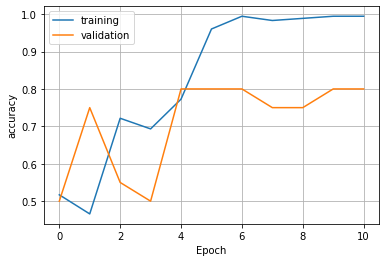

In [47]:
#introducing dropout in 3rd layer -50% neurons to be dropped
### Model Architecture ##########################
from keras.regularizers import l2
num_classes = 2
model3 = Sequential() # Initiatlizing the sequential model
model3.add(Conv2D(32,kernel_size=3,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l=0.01),input_shape=(128,128,3))) # Adding the first layer with input data
# Used no of filters as 32 with kernel size as 3 x 3. Activation used - ReLu
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64,kernel_size=3,kernel_regularizer=l2(l=0.01),activation='relu'))
model3.add(MaxPooling2D(2,2))
#Defining FC layers:
model3.add(Flatten())
model3.add(Dense(128,kernel_regularizer=l2(l=0.01),activation='relu'))
model3.add(Dropout(.2))
model3.add(Dense(num_classes,activation='softmax')) # for binary class classification useing softmax and no of classes as 2
model3.summary()

### Model Compilation with Adam optimizer ##########################
adam = tensorflow.keras.optimizers.Adam()
model3.compile(optimizer= adam, loss ='categorical_crossentropy', metrics =['accuracy'])

### Model Building ##########################
batch_size = 32
n_epochs = 100
es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)
history = model3.fit(X_train, trainY, batch_size=batch_size, epochs=n_epochs, validation_split=0.1, callbacks = [es], verbose=False) #train the model
hist_df = pd.DataFrame(history.history)
best_epoch = (pd.DataFrame(history.history['val_accuracy']).shape[0] - 1)
validation_accuracy = pd.DataFrame(history.history['val_accuracy']).iloc[best_epoch,0]
Train_accuracy = pd.DataFrame(history.history['accuracy']).iloc[best_epoch,0]
validation_loss = pd.DataFrame(history.history['val_loss']).iloc[best_epoch,0]
Train_loss = pd.DataFrame(history.history['loss']).iloc[best_epoch,0]
optimizer = 'ADAM'
print('\n*****************************************************')
print('With Optimizer as ', optimizer ,': We get \n')
print('Training_Accuracy:', np.round((Train_accuracy*100),2))
print('Training_Loss: %.3f' %Train_loss)
print('Validation_Accuracy:',np.round((validation_accuracy*100),2))
print('Validation_Loss: %.3f' %validation_loss)
#Evaluate Model with Adam
loss,accuracy  = model3.evaluate(testX, testY, verbose=False)

## Accuracy Graph
print('\nModel accuracy : %.2f and loss :%.2f' %(accuracy*100, loss))
plt.plot(hist_df2.accuracy, label='training_accuracy')
plt.plot(hist_df2.val_accuracy, label='validation_accuracy')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')
plt.grid(True)

We now have improved the model with hyperparameter tuned and bringing the model from overfit zone to fit zone and we have improved model accuracy.
